<a href="https://colab.research.google.com/github/RahulChakravorty/Rossmann-Retail-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_Rahul_Chakravorty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Rossmann Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**


Rossmann, one of Europe’s largest drugstore chains, operates over 3,000 stores across multiple locations. The company faces challenges in accurately predicting daily sales, which directly impacts inventory management, workforce planning, and revenue forecasting. Since sales are influenced by various factors such as promotions, store types, competition, holidays, and seasonality, a data-driven approach is essential to optimize business operations and improve profitability.

The goal of this project is to build a machine learning model that can accurately forecast daily sales for Rossmann stores based on historical data and external influencing factors. The model aims to optimize store operations, reduce inventory wastage, improve staffing decisions, and maximize revenue by providing accurate sales predictions.



1. Data Understanding & Preprocessing:

  The dataset consists of two main files:

    *   train.csv → Contains daily sales data for each store.
    *   store.csv → Provides additional information about store characteristics.

  To prepare the data for modeling, several preprocessing steps were performed:

  *   Handling Missing Values: Columns like CompetitionDistance and Promo2 had missing values, which were either imputed (using median values) or dropped if missing data was excessive.
  *   Merging Datasets: The train.csv and store.csv files were merged using the common Store column.
  *   Categorical Encoding: Converted categorical variables (StoreType, StateHoliday, Assortment) into numerical values to make them suitable for machine learning models.



2.  Exploratory Data Analysis (EDA) & Hypothesis Testing:

  Several visualizations were performed to identify key sales trends:

    *   Sales Trend Analysis → Sales were relatively stable across years but exhibited strong seasonality.
    *    Impact of Promotions → Stores running promotions (Promo=1) had significantly higher sales.
    *   Effect of Store Type & Competition → Certain store types consistently outperformed others, and stores closer to competitors saw reduced sales.
    *   Impact of Holidays & Weekends → Sales dropped significantly on state holidays and weekends.

  Based on the chart experiments, three hypothetical statements were defined for further statistical testing:

    *   Holidays have a significant impact on store sales.
    *   Sales on weekends (Saturday & Sunday) are different from sales on weekdays.
    *   Stores in urban areas have higher sales than stores in rural areas.

  To validate these hypotheses, a two-sample Z-test was performed, and the null hypothesis was rejected in all three cases, confirming the statistical significance of these factors.



3.   Model Selection & Performance Evaluation:

  Several regression models were trained and evaluated using standard performance metrics and R2 value was found to be:

    *   Decision Tree Regression = 0.88 (Best performing model)
    *   Linear Regression = 0.85
    *   Random Forest Regression = 0.78

  Decision Tree Regressor was selected as the final model because it achieved the highest R² Score (0.88) and lowest RMSE, making it the most reliable model for sales forecasting.

  Hyperparameter tuning using RandomizedSearchCV further improved model performance.

4. Model Explainability Using SHAP (SHapley Additive Explanations):

  To interpret feature importance, SHAP values were analyzed, revealing that:

    *   Customers had the highest impact on sales predictions → Higher customer traffic directly increased sales.
    *   Promotions significantly boosted sales → Promotional strategies played a crucial role in revenue growth.
    *   CompetitionDistance negatively affected sales → Stores closer to competitors experienced reduced sales.
    *   Holidays & weekends influenced sales trends → Sales dropped significantly during holidays.

5. Business Impact & Conclusion:

  The final model provides accurate sales forecasts, enabling Rossmann to:

    *   Optimize Inventory → Reduce overstocking and understocking issues.
    *    Improve Staffing Decisions → Allocate workforce efficiently based on predicted sales.
    *   Enhance Promotional Strategies → Run targeted promotions to maximize revenue.
    *   Enhance Promotional Strategies → Run targeted promotions to maximize revenue.

  
By leveraging this predictive model, Rossmann can make data-driven business decisions, improving operational efficiency and profitability.




















    



















# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Build a predictive model to forecast daily sales for Rossmann stores using historical sales data and external factors such as promotions, competition, holidays, and store attributes. The model should help Rossmann optimize inventory, staffing, and marketing strategies to maximize revenue and operational efficiency.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss
import math
from sklearn.ensemble import RandomForestRegressor
!pip install scikit-optimize
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn import ensemble


from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.3 MB/s eta 0:00:00


### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
#Rossmann Data
sales_df=pd.read_csv('/content/drive/MyDrive/ML Datasets/Rossmann Stores Data.csv')

#store data
store_df=pd.read_csv('/content/drive/MyDrive/ML Datasets/store.csv')

### Dataset First View

In [6]:
# Dataset First Look
sales_df.head()  # For Rossmann Sales Data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [8]:
store_df.head()  # For Store Data

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
sales_df.shape,store_df.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [11]:
# Dataset Info
sales_df.info(),store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

(None, None)

#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
sales_df.duplicated().sum(),store_df.duplicated().sum()

(0, 0)

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
sales_df.isnull().sum(),store_df.isnull().sum()

(Store            0
 DayOfWeek        0
 Date             0
 Sales            0
 Customers        0
 Open             0
 Promo            0
 StateHoliday     0
 SchoolHoliday    0
 dtype: int64,
 Store                          0
 StoreType                      0
 Assortment                     0
 CompetitionDistance            3
 CompetitionOpenSinceMonth    354
 CompetitionOpenSinceYear     354
 Promo2                         0
 Promo2SinceWeek              544
 Promo2SinceYear              544
 PromoInterval                544
 dtype: int64)

### What did you know about your dataset?

The dataset contains historical sales data from Rossmann, a large drugstore chain in Europe. The goal is to predict future sales using store-level information, promotions, holidays, and other factors.

Rossmann Stores Data.csv - historical data including Sales.

Store.csv - supplemental information about the stores

The Sales_df dataset has 1017209 rows and 9 columns while the Store_df dataset has 1115 rows and 10 columns.

There are no null values in the columns of the sales_df dataset whereas  CompetitionDistance, CompetitionOpenSinceMonth, Promo2SinceWeek, Promo2SinceYear,  PromoInterval are the columns in the store_df dataset having null values.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
sales_df.columns    # For Rossmann Sales Data

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [15]:
store_df.columns     # For Store Data

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [16]:
#checking the mean mode and median in rossmann sales dataset using describe function
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
#checking the mean mode and median in rossmann store dataset using describe function
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Variables Description

Store ID: An integer that uniquely identifies each store.

DayOfWeek: An integer that represents the day of the week (1 for Monday, 2 for Tuesday, etc.).

Date: The date of the observation.

Open: A binary variable indicating whether the store was open on the given day.

Promo: A binary variable indicating whether there was a promotional sale in effect at the store on the given day.

StateHoliday: A categorical variable indicating whether the day was a state holiday in the store's region. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday: A binary variable indicating whether there was a school holiday in the store's region on the given day.

StoreType: A categorical variable indicating the type of store (a, b, c, or d).

Assortment: A categorical variable indicating the level of assortment provided in the store (a = basic, b = extra, c = extended).

CompetitionDistance: The distance in meters to the nearest competitor store.

CompetitionOpenSince[Month/Year]: The month and year of the nearest competitor store's opening date.

Promo2: A binary variable indicating whether the store was participating in a continuing and consecutive promotion (i.e. a second ongoing promotion after the first that is not directly related to the first) on the given day.

Promo2Since[Year/Week]: The year and week of the store's participating in the second promotion.

PromoInterval: A categorical variable indicating the consecutive intervals at which the store is running the second promotion.

Sales: The amount of sales for the given day, which is the target variable that we are trying to predict.

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.

# No of Unique Values in each variable in rossmann sales dataset
sales_df.nunique()

,0
Store,1115
DayOfWeek,7
Date,942
Sales,21734
Customers,4086
Open,2
Promo,2
StateHoliday,5
SchoolHoliday,2


In [19]:
# No of Unique Values in each variable in rossmann store dataset
store_df.nunique()

,0
Store,1115
StoreType,4
Assortment,3
CompetitionDistance,654
CompetitionOpenSinceMonth,12
CompetitionOpenSinceYear,23
Promo2,2
Promo2SinceWeek,24
Promo2SinceYear,7
PromoInterval,3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# remove features with high percentage of null values
store_df_new = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

In [21]:
#replacing Nan values in CompetitionDistance with median.
store_df_new['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

In [22]:
# Checking null values Rossmann Sales Dataset
store_df_new.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,0
Promo2,0


In [23]:
store_df_new.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1
2,3,a,a,14130.0,1
3,4,c,c,620.0,0
4,5,a,a,29910.0,0


In [24]:
# Merge the sales_df and store_df by column 'Store' as in both csv files 'Store' column is common
df = pd.merge(sales_df, store_df_new, on='Store', how='left')
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0


In [25]:
df.shape  # Dimensions of new merged dataset

(1017209, 13)

In [26]:
df.info() # Information regarding the merged dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Store                1017209 non-null  int64  
 1   DayOfWeek            1017209 non-null  int64  
 2   Date                 1017209 non-null  object 
 3   Sales                1017209 non-null  int64  
 4   Customers            1017209 non-null  int64  
 5   Open                 1017209 non-null  int64  
 6   Promo                1017209 non-null  int64  
 7   StateHoliday         1017209 non-null  object 
 8   SchoolHoliday        1017209 non-null  int64  
 9   StoreType            1017209 non-null  object 
 10  Assortment           1017209 non-null  object 
 11  CompetitionDistance  1017209 non-null  float64
 12  Promo2               1017209 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 100.9+ MB


In [27]:
# From date column we separate the date, month and year
#creating new variable date month and year from Date column
df['year'] = df['Date'].apply(lambda x: x.split('-')[0])
df['month'] = df['Date'].apply(lambda x: x.split('-')[1])
df['date'] = df['Date'].apply(lambda x: x.split('-')[2])

In [28]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,0,2015,07,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,1,2015,07,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,1,2015,07,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,0,2015,07,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,0,2015,07,31


In [29]:
# Since many columns are in object datatype so we shall check the datatype of these column
# because our machine learning algorithms only takes numerical values.

#Change data types object to int
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3

#store the value with same column name i.e StateHoliday with function astype
df['StateHoliday'] = df['StateHoliday'].astype(int, copy=False)

In [30]:
# change Data Types object into int
df.loc[df['Assortment'] == 'a', 'Assortment'] = 0
df.loc[df['Assortment'] == 'b', 'Assortment'] = 1
df.loc[df['Assortment'] == 'c', 'Assortment'] = 2

#store the value with same column name i.e Assortment with function astype
df['Assortment'] = df['Assortment'].astype(int, copy=False)

In [31]:
# change Data Types object into int
df.loc[df['StoreType'] == 'a', 'StoreType'] = 0
df.loc[df['StoreType'] == 'b', 'StoreType'] = 1
df.loc[df['StoreType'] == 'c', 'StoreType'] = 2
df.loc[df['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
df['StoreType'] = df['StoreType'].astype(int, copy=False)

In [32]:
print(df[['StateHoliday', 'Assortment', 'StoreType']].nunique())   # Checking the number of unique values in the mentioned column

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [33]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,year,month,date
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900.0,1,2013,01,01
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880.0,0,2013,01,01
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260.0,0,2013,01,01
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870.0,0,2013,01,01
1017208,1115,2,2013-01-01,0,0,0,0,1,1,3,2,5350.0,1,2013,01,01


In [34]:
# Changing format of date from object to datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%Y-%m-%d')

In [35]:
# Converting the datatype of year,month,date,CompetitionDistance into integer
df['year']= df['year'].astype(int)
df['month']= df['month'].astype(int)
df['date']= df['date'].astype(int)
df['CompetitionDistance']= df['CompetitionDistance'].astype(int)

In [36]:
final_df = df.copy()

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  int64         
 8   SchoolHoliday        1017209 non-null  int64         
 9   StoreType            1017209 non-null  int64         
 10  Assortment           1017209 non-null  int64         
 11  CompetitionDistance  1017209 non-null  int64         
 12  Promo2               1017209 non-null  int64         
 1

### What all manipulations have you done and insights you found?

Handling Missing Values:


*  sales_df had zero null values, while store_df had missing values in six columns:
  *  'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', and 'CompetitionDistance'.

*   Since 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' had a high percentage of missing values, they were dropped.

*  The missing values in 'CompetitionDistance' were filled with the median to prevent bias.


Merging Datasets:

*   The sales_df and store_df were merged using the 'Store' column, as it was the common key in both datasets.

Feature Engineering:


*   Date Transformation:
  *   The 'Date' column was converted from object type to datetime format.
  *   Extracted year, month, and day from the date for better feature representation.


*   Categorical Encoding:
  
  The encoding technique used before was Label Encoding (Manual Mapping), where categorical values are converted into numerical values.

  Label Encoding works well when categorical values have an inherent order (e.g., Assortment might have increasing product variety) and it is Memory-efficient, as it replaces strings with integers.

  *   Assortment' values ('a', 'b', 'c') where (a = basic, b = extra, c = extended) were label-encoded as 0,1,2 to provide weightage in the model.
  *   'StateHoliday' values ('0', 'a', 'b', 'c') where (a = public holiday, b = Easter holiday, c = Christmas, 0 = None) were encoded as 0,1,2,3.
  *   'StoreType' values ('a', 'b', 'c', 'd') were encoded as 0,1,2,3.


Data Type Optimization:

*   Converted 'year', 'month', 'day', and 'CompetitionDistance' to integer type for efficient processing.



















## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

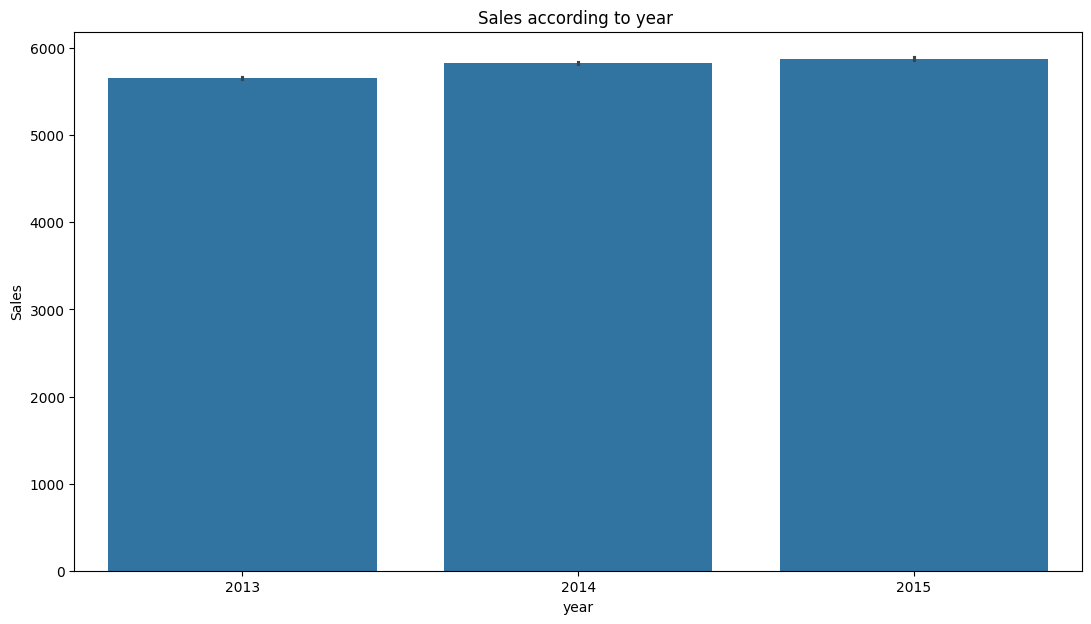

In [38]:
# Sales according to year

fig,ax=plt.subplots(figsize=(13,7))
sns.barplot(data=final_df,x='year',y='Sales',ax=ax)
ax.set(title='Sales according to year ')
plt.show()

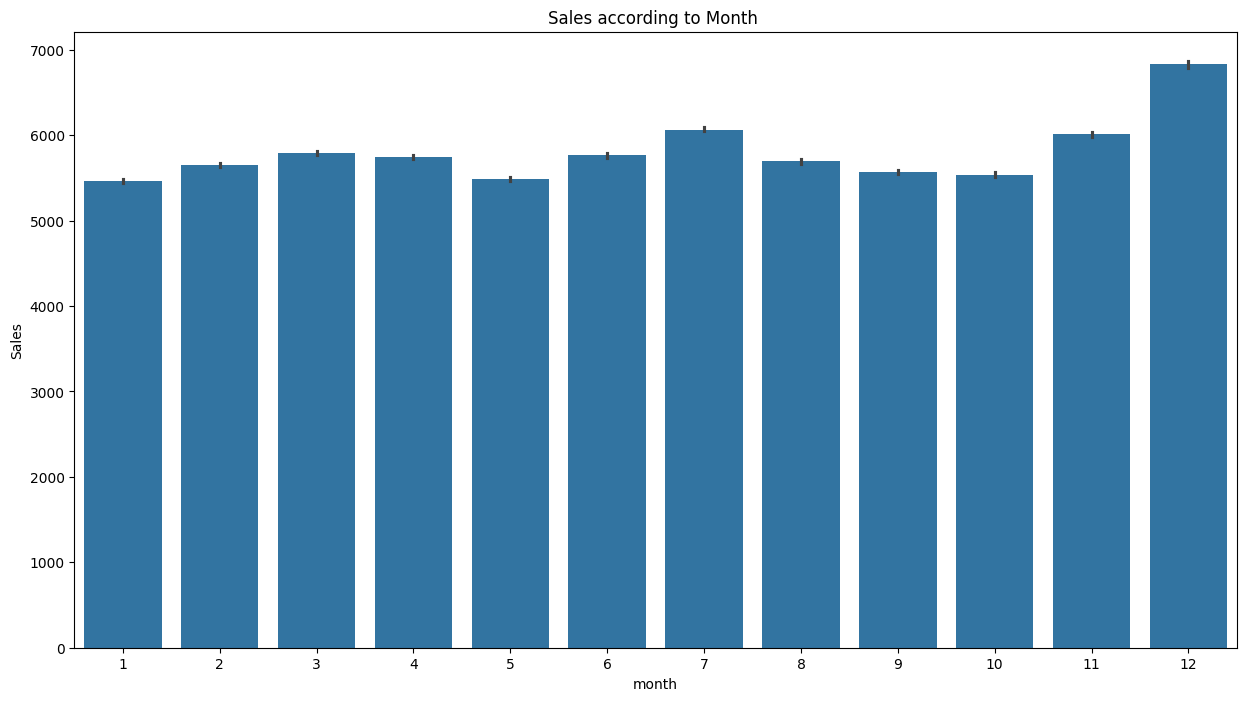

In [39]:
# Sales according to month

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='month',y='Sales',ax=ax)
ax.set(title='Sales according to Month ')
plt.show()

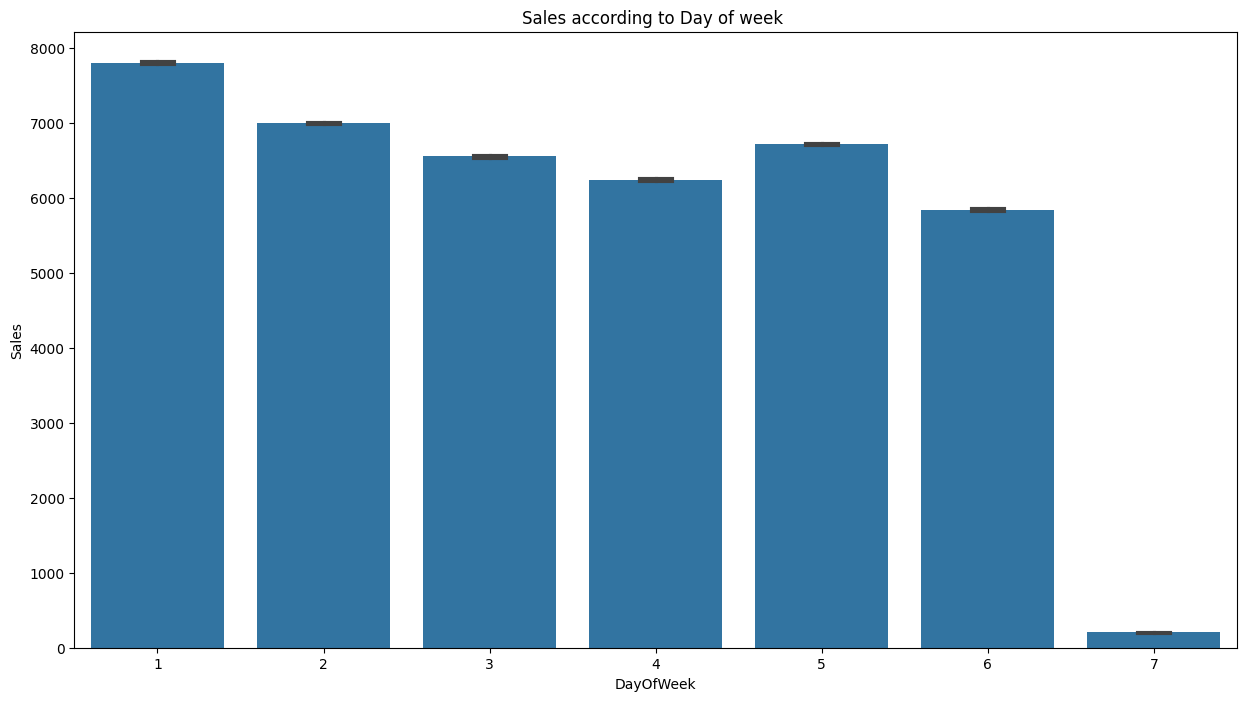

In [40]:
# Sales according to day of week

fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=final_df,x='DayOfWeek',y='Sales',ax=ax,capsize=.2)
ax.set(title='Sales according to Day of week ')
plt.show()

##### 1. Why did you pick the specific chart?

The bar charts display sales trends over different time periods (Year, Month, and Day of the Week).

##### 2. What is/are the insight(s) found from the chart?

Sales Trends by Year

*  Sales are consistent across 2013, 2014, and 2015, with only slight variations.
*  No major increase or decline in sales over the years.
*  This suggests that external economic factors or overall store operations remained stable.

Sales Trends by Month

*   December (Month 12) has the highest sales likely due to the holiday season and festive shopping.
*   Sales are lower around May and September → Could indicate a seasonal dip or lack of promotions during these months.
*   Mid-year sales (June-July) see a slight peak → Possibly due to summer shopping trends.

Sales Trends by Day of the Week

*   Monday (Day 1) has the highest sales, followed by Tuesday and Wednesday.
*   Sales gradually decline from Thursday to Saturday.
*   Sunday (Day 7) has the lowest sales → Many stores might be closed or have limited operations.






Actionable Insights :
*   Stores should plan promotions early in the week (Monday-Wednesday) to leverage high footfall.
*   Retailers can optimize promotions in slower months (May & September) and maximize stock during December to capitalize on peak sales.



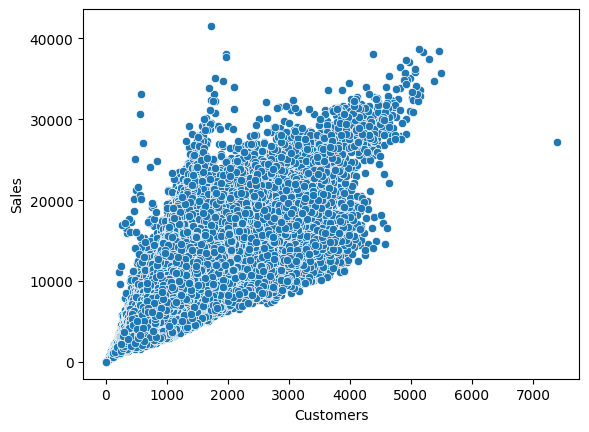

In [41]:
#Scatterplot of Customers and Sales

sns.scatterplot(x=final_df['Customers'], y=final_df['Sales'])
plt.show()

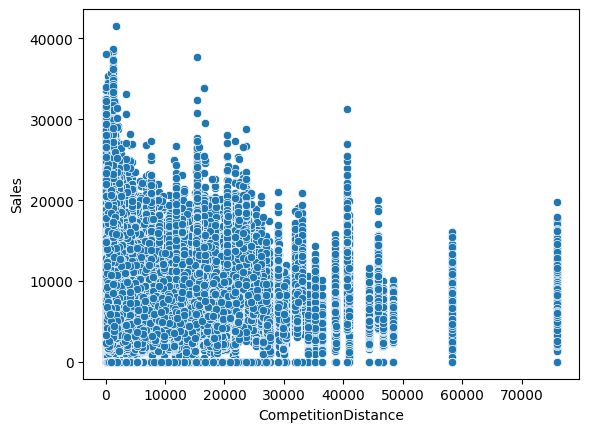

In [42]:
#Scatterplot of Competition Distance and Sales

sns.scatterplot(x=final_df['CompetitionDistance'], y=final_df['Sales'])
plt.show()

##### 1. Why did you pick the specific chart?

The two scatter plots analyze the relationships between Sales vs. Customers and Sales vs. Competition Distance.

##### 2. What is/are the insight(s) found from the chart?

Sales vs. Customers


*   There is a strong positive correlation between the number of customers and sales.
*   There is some dispersion, but the overall trend confirms that higher foot traffic leads to higher sales.
*   Some outliers exist where sales are unusually high even with fewer customers (possibly due to high-value purchases).


Sales vs. Competition Distance


*   Most sales are clustered when competition is close (low distance).
*   There are stores with high sales even when competition is far, suggesting that other factors (like promotions, store type, and location) play a bigger role in determining sales.
*   A few stores show low sales despite little competition nearby, indicating possible internal factors affecting performance.



Actionable Insight:

*   Stores should focus on increasing customer footfall through promotions, better location strategies, and optimized store operations.
*   Competition proximity alone does not dictate sales. Instead, factors like store reputation, pricing, and customer experience matter more.



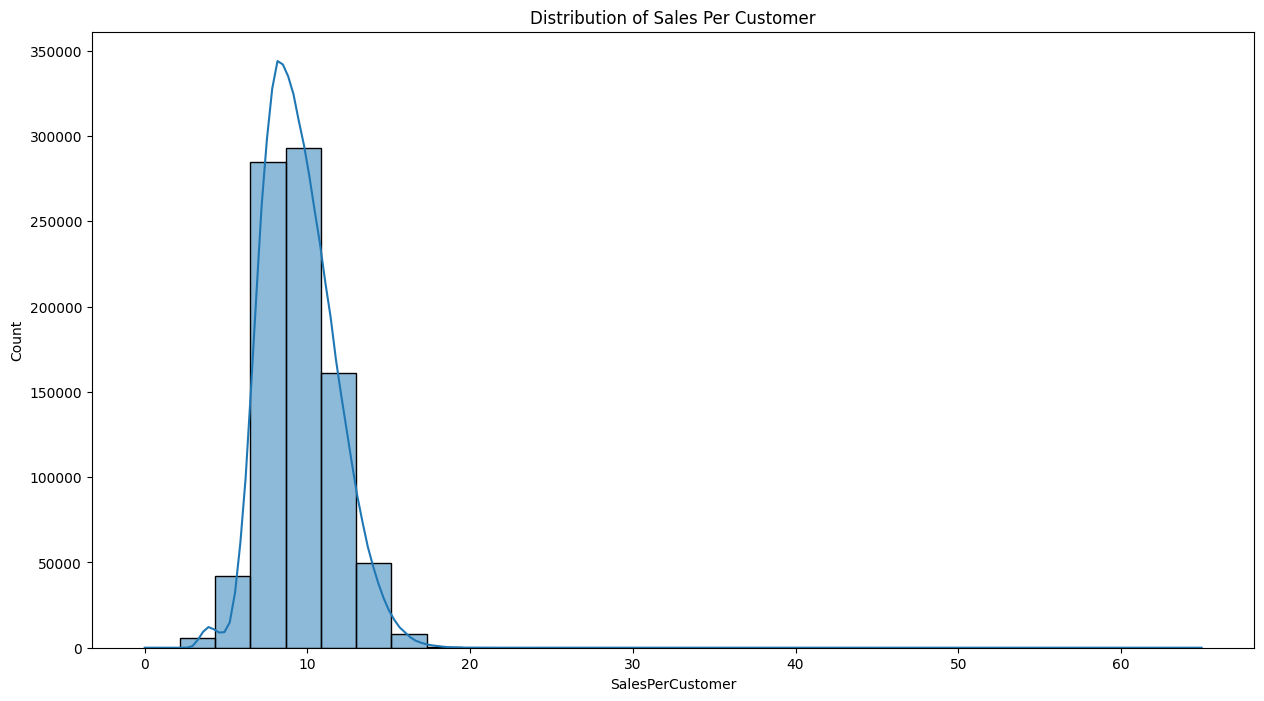

In [43]:
# Average Sales per customer


fig,ax=plt.subplots(figsize=(15,8))
final_df['SalesPerCustomer'] = final_df['Sales'] / final_df['Customers']
sns.histplot(final_df['SalesPerCustomer'], bins=30, kde=True,ax=ax)
plt.title('Distribution of Sales Per Customer')
plt.show()

In [44]:
#Dropping the column as its purpose has been served
final_df.drop('SalesPerCustomer', axis=1, inplace=True)

##### 1. Why did you pick the specific chart?

This histogram with a KDE (Kernel Density Estimation) plot represents the distribution of sales per customer across different transactions.

##### 2. What is/are the insight(s) found from the chart?


*   Sales per customer is normally distributed with most values clustered around the central range.
*   Most customers contribute between 7 to 12 units of sales which indicates that the majority of customers make purchases within a similar spending range.

*   There are a few high-value outliers which could be due to bulk purchases or high-ticket items.






Actionable Insights:

*    Since most customers contribute 7-12 units of sales, stores can create promotions or loyalty programs targeting this range.
*   Understanding why some customers spend significantly more can help in identifying premium products or upselling opportunities.



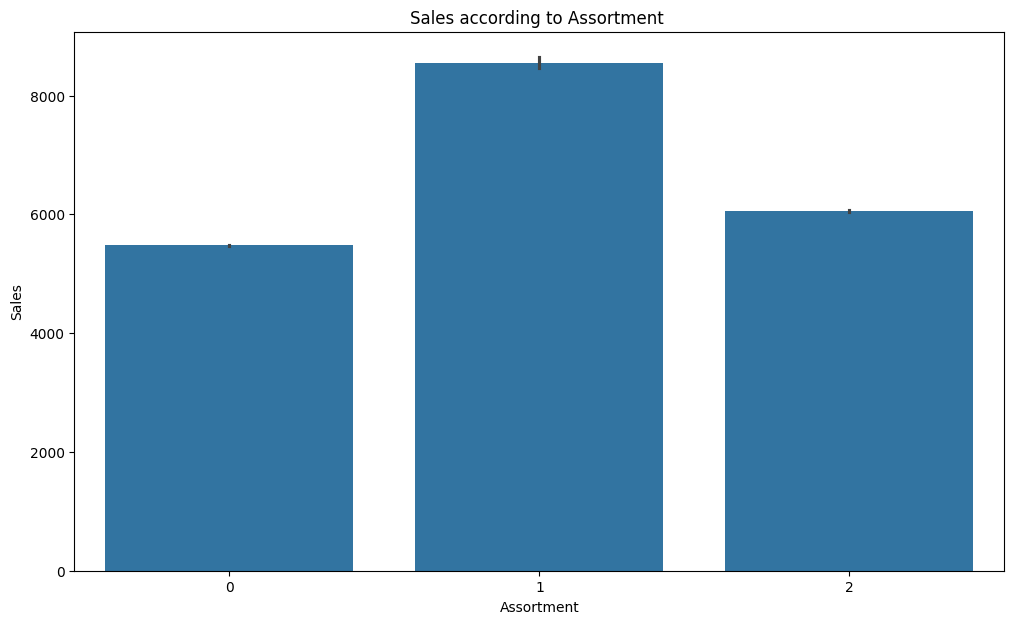

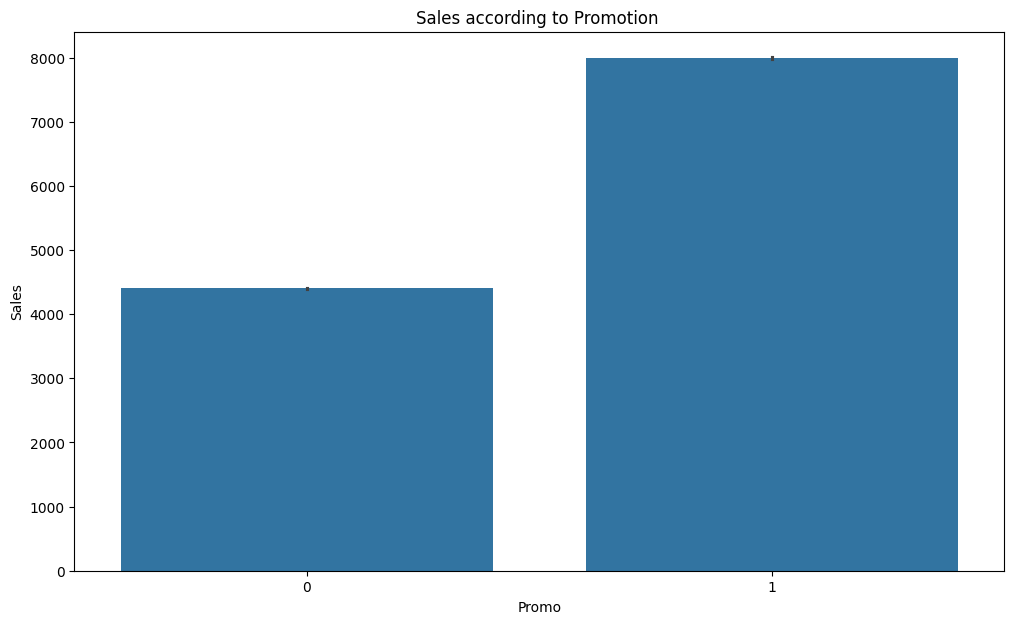

In [45]:
# Sales according to assortment and promotion

fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=final_df,x='Assortment',y='Sales',ax=ax)
ax.set(title='Sales according to Assortment ')
plt.show()

fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=final_df,x='Promo',y='Sales',ax=ax)
ax.set(title='Sales according to Promotion ')
plt.show()

##### 1. Why did you pick the specific chart?

These specific bar charts effectively illustrate the impact of Assortment and Promotions on sales in a clear and comparative manner.

##### 2. What is/are the insight(s) found from the chart?

Sales vs. Assortment (First Chart)  [Assortment types(1= basic, 2 = extra, 3 = extended)]

*   Stores with Assortment type = 1 have the highest sales.
*   Assortment type 0 and 2 have relatively lower sales, but Assortment type 2 performs slightly better than type 0.


Sales vs. Promotion (Second Chart)

*   Stores running promotions (Promo = 1) have significantly higher sales than those without promotions (Promo = 0).
*   This confirms that promotions strongly drive sales increases.








Actionable Insights:

*   Stores should analyze what specific products drive higher sales in Assortment type 1 and consider expanding or optimizing their assortment.
*   More frequent and well-placed promotions can drive higher revenue.



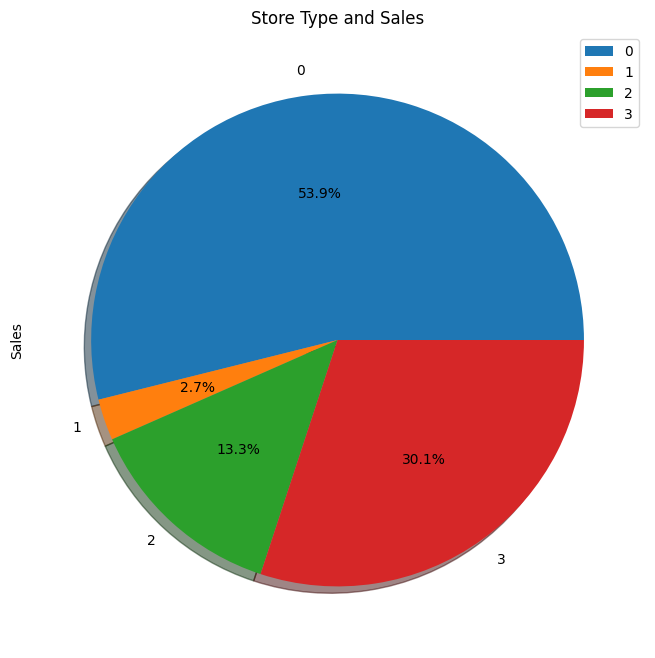

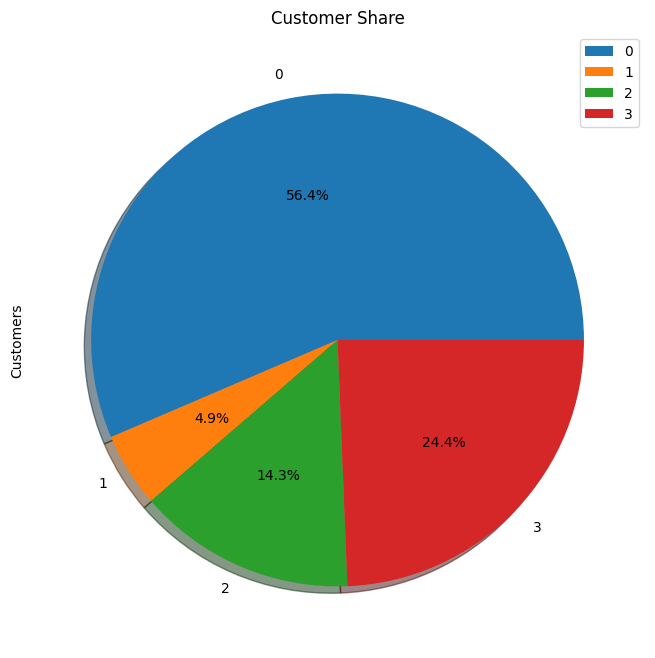

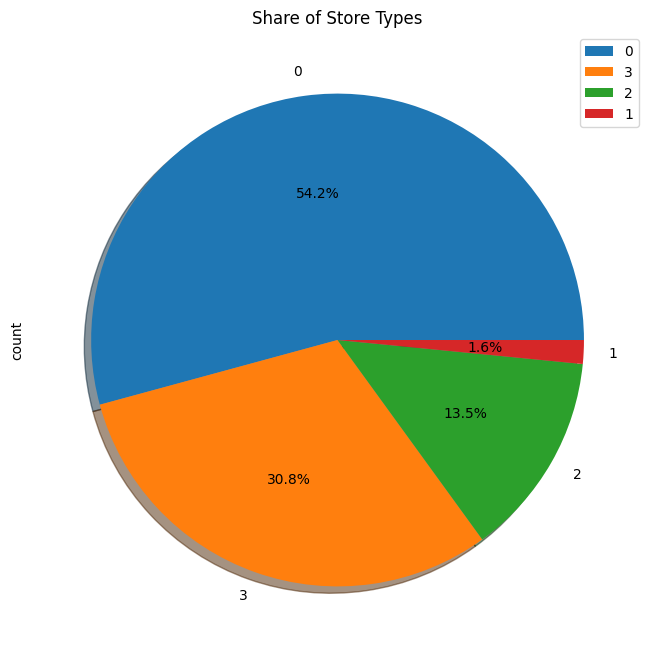

In [46]:
#let's explore store type a bit and it's influence on sales

fig,ax=plt.subplots(figsize=(15,8))
final_df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True,ax=ax)
plt.show()

#customers and store type
fig,ax=plt.subplots(figsize=(15,8))
final_df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True,ax=ax)
plt.show()

#store types in all of the dataset
fig,ax=plt.subplots(figsize=(15,8))
final_df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True,ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts were chosen because they are best for showing category-wise proportions.They provide a clear visual breakdown of store distribution, sales share, and customer share.

##### 2. What is/are the insight(s) found from the chart?

Store Type and Sales (First Chart)

*   Store Type 0 contributes the most to total sales (53.9%), followed by Store Type 3 (30.1%).
*   Store Type 1 has the least contribution (2.7%).
*   Store Type 2 has moderate sales (13.3%).

Customer Share by Store Type (Second Chart)

*   Store Type 0 has the highest customer share (56.4%).
*   Store Type 3 follows with 24.4%, but its sales share (30.1%) is slightly higher than its customer share.
*   Store Type 1 has the least customer share (4.9%), correlating with its low sales performance.

Store Type Distribution (Third Chart)

*   Store Type 0 is the most common (54.2%), followed by Type 3 (30.8%).   
*   Store Type 1 is the least common (1.6%).











Actionable Insight:

*   Store Type 0 and 3 are the biggest revenue generators, so focusing on these store types for promotions and expansion is beneficial.
*   Store Type 3 generates higher sales per customer compared to Type 0, suggesting that customers in Type 3 stores spend more per visit.
*   The high number of Type 0 stores explains why they dominate sales.






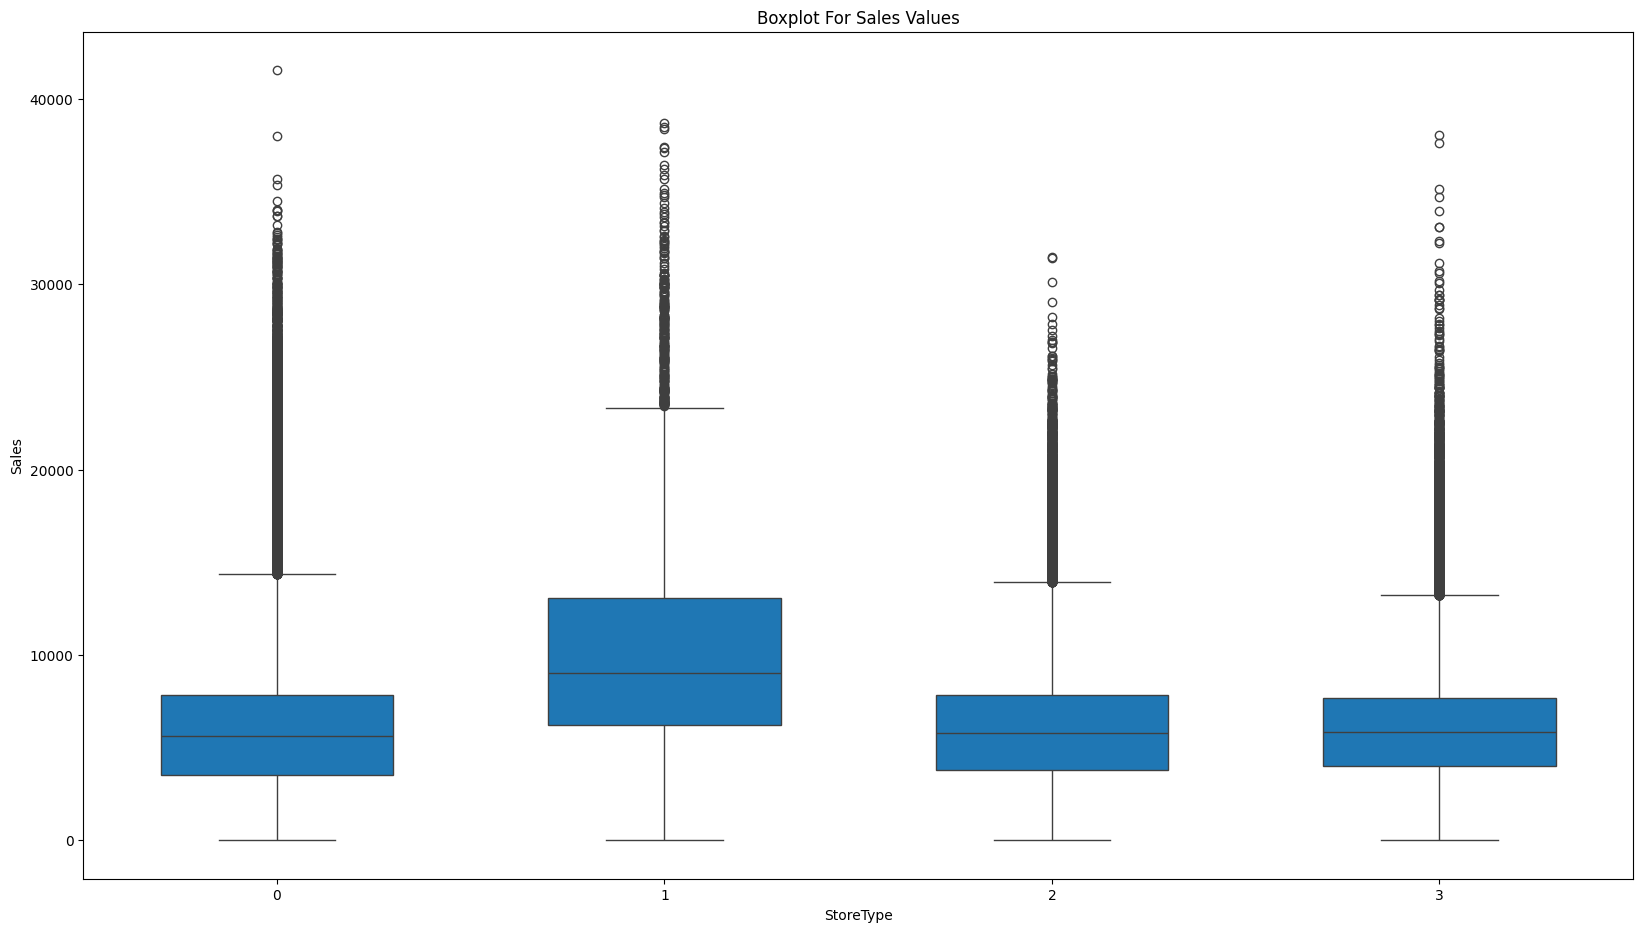

In [47]:
# Sales value on basis of Store Type

# ploting a box plot
plt.figure(figsize=(20, 11)) #figer size
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final_df, saturation=1.25,width=0.6)  # box plot ploting.
plt.title('Boxplot For Sales Values') #title for chart
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot was chosen because it provides deep insights into sales distribution, outliers, and variability across store types.

##### 2. What is/are the insight(s) found from the chart?


*   Store Type 1 has the highest median sales as the median sales (middle line in the box) for Store Type 1 is higher than all other store types.

*   Store Type 0, 2, and 3 have similar median sales which means these store types perform similarly in terms of typical sales values.

*   All store types have many outliers (high sales spikes) which could be due to special promotions, seasonal demand, or store location advantages.

*   Store Type 1 has a higher interquartile range (IQR), meaning that its sales values are more spread out, indicating greater variation in performance.





Actionable Insights:

*   Since Store Type 1 has the highest median sales, it could be a strong candidate for further investment or expansion.
*   Identifying High-Performing stores and understanding their success factors (e.g., location, promotions, product mix) can help improve sales in other stores.





Not a School Holiday : 0
School Holiday : 1


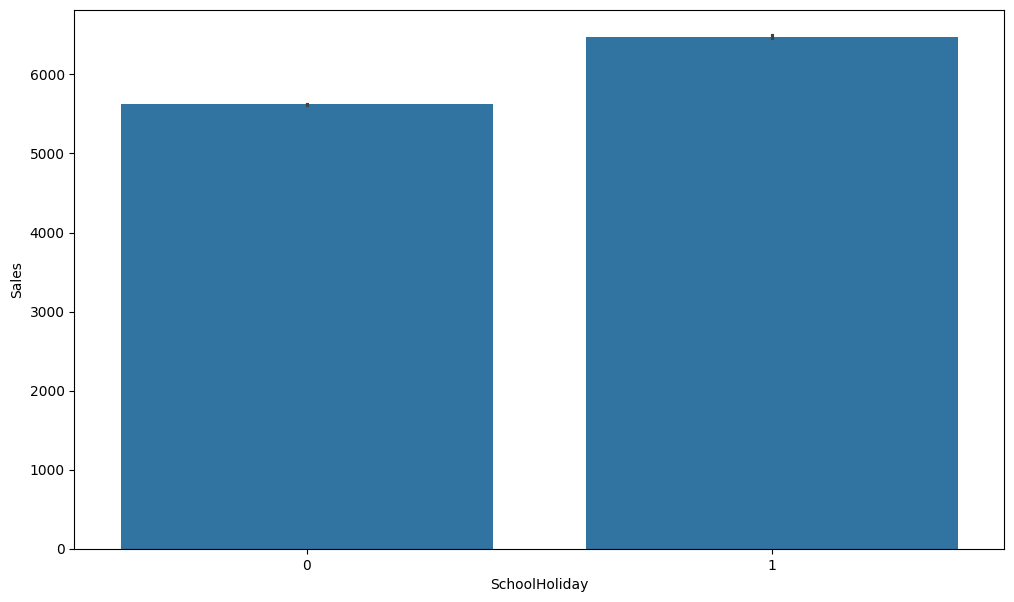

In [48]:
# School Holiday VS Sales

fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data = final_df, x = 'SchoolHoliday', y = 'Sales',ax=ax)

print("Not a School Holiday : 0")
print("School Holiday : 1")

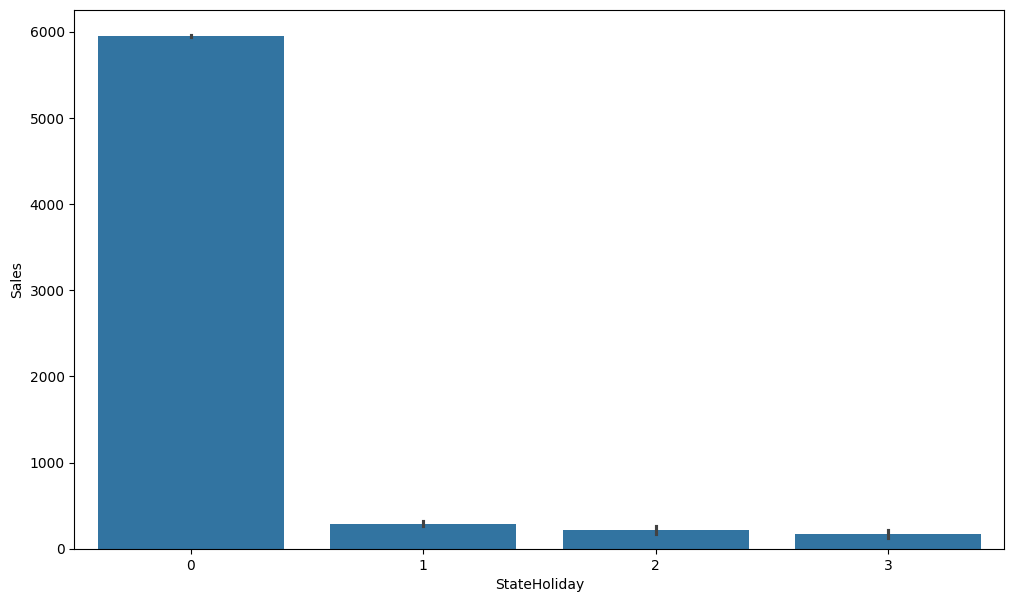

In [49]:
# State Holiday VS Sales

fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data = final_df, x = 'StateHoliday', y = 'Sales',ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

These bar charts analyze how School Holidays and State Holidays impact sales.

##### 2. What is/are the insight(s) found from the chart?

Sales on School Holidays vs. Non-School Holidays (First Chart)

*   Sales are higher on school holidays compared to non-school holidays which suggests that families tend to shop more when schools are closed.
*   The increase is noticeable but not extreme, meaning other factors (e.g., promotions, store type) may also contribute to sales variations.

Sales on State Holidays vs. Non-State Holidays (Second Chart)

*   Sales drop significantly on state holidays (public holidays, Easter, Christmas).
*   Regular days (0 = no holiday) have the highest sales.
*   Easter, Christmas, and other public holidays (1, 2, 3) see a massive decline in sales, likely because many stores remain closed or operate at reduced hours.





Actionable Insight:

*   Stores should strategically plan promotions during school holidays to maximize sales.
*   If stores are closed during state holidays, online or early promotional campaigns can help recover lost sales.



#### Correlation Heatmap

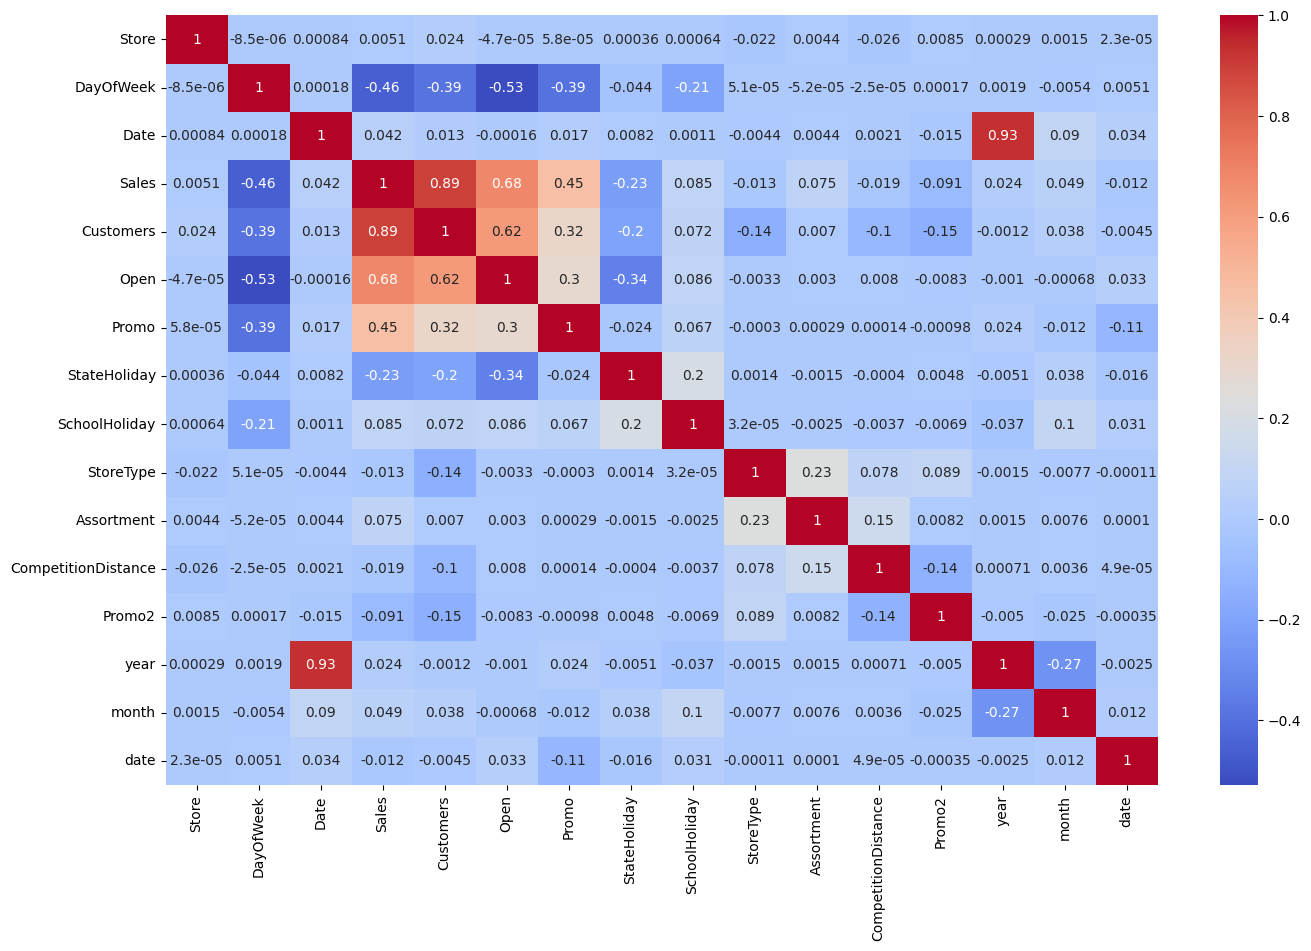

In [50]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16,10))
sns.heatmap(final_df.corr(), cmap="coolwarm", annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

This correlation heatmap provides a clear, visual summary of how different features in the dataset are related to each other.

##### 2. What is/are the insight(s) found from the chart?



*   Sales and Customers have strong positive correlation as higher customer count leads to higher sales, which is expected.
*   Open and Sales (0.68) have positive correlaton as stores that are open naturally generate sales.
*   Open and DayOfWeek (-0.53) have negative correlaton indicating that some stores are closed on certain days, likely Sundays.
*   Sales and StateHoliday (-0.23) have negative correlation as sales drop on state holidays, likely due to store closures.




Actionable Insight:
*   Since state holidays reduce sales, stores should consider alternative strategies like online sales or special promotions.
*   Since customers drive sales, strategies should focus on increasing foot traffic.



####  Pair Plot

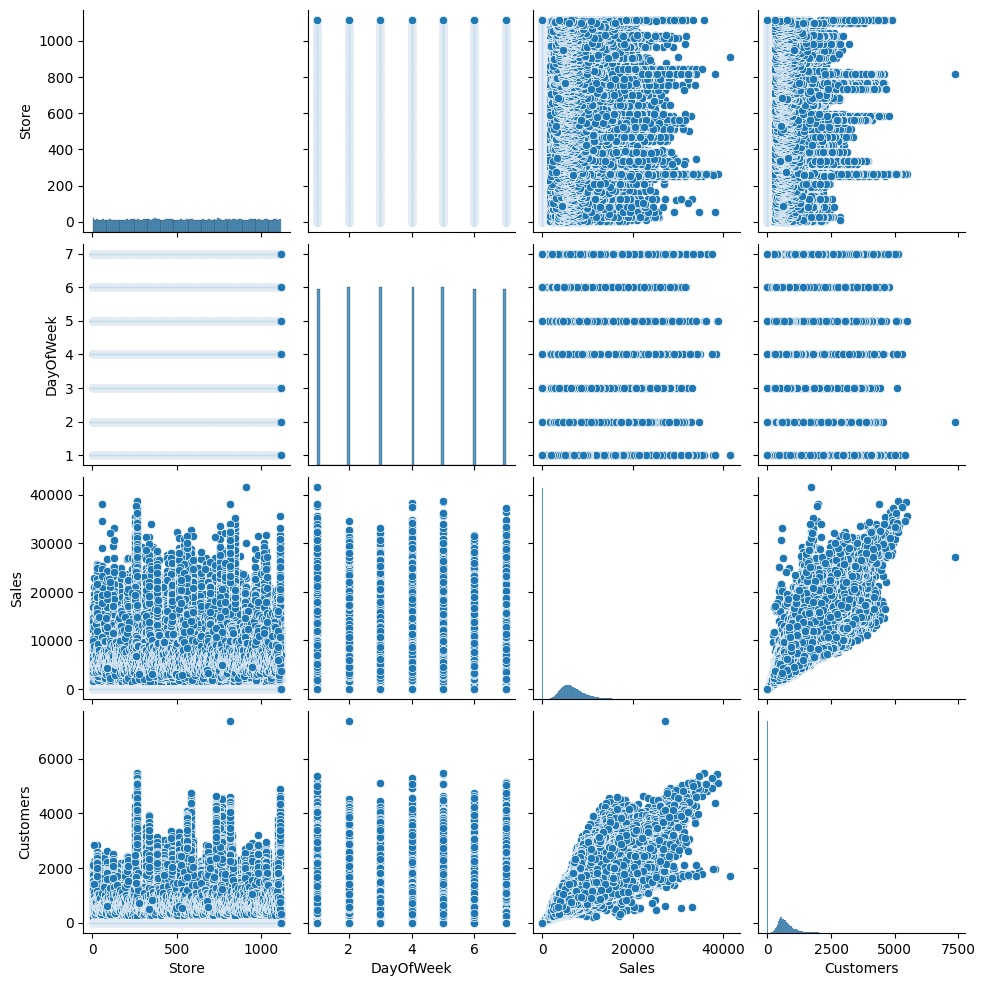

In [51]:
# Pair Plot visualization code
sns.pairplot(final_df[['Store', 'DayOfWeek', 'Sales', 'Customers']])

##### 1. Why did you pick the specific chart?

A pair plot helps analyze relationships between multiple numerical variables in the dataset. It shows scatter plots for feature relationships and histograms along the diagonal for individual feature distributions.

##### 2. What is/are the insight(s) found from the chart?



*   Sales and Customers Have a Strong Positive Correlation as more customers lead to higher sales, confirming previous insights.
*   The Sales vs. DayOfWeek plot shows clear groupings, meaning sales patterns vary by day as certain days (e.g., Sundays) likely have much lower sales.
*   The histogram for Sales (diagonal plot) shows a right-skewed distribution, meaning most sales values are concentrated in the lower range, but some stores achieve very high sales.



Actionable Insight:

*   Maximizing foot traffic through marketing and promotions will directly increase sales.
*   Consider weekend discounts or weekday deals based on traffic patterns.

*   Investigate top-performing stores to understand what drives exceptional sales and apply those strategies across other stores.






## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement - 1 : Holidays have a significant impact on store sales.

Hypothetical Statement - 2 - Sales on weekends (Saturday & Sunday) are different than sales on weekdays.

Hypothetical Statement - 3 - Stores in urban areas have higher sales than stores in rural areas.

## Hypothetical Statement - 1 : Holidays have a significant impact on store sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

  

###*   H₀ (Null Hypothesis): There is no significant difference in sales on holidays versus non-holidays.
###*   H₁ (Alternative Hypothesis): Holidays significantly impact store sales.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value


# Separate sales based on holidays
holiday_sales = final_df[final_df['StateHoliday'] != 0]['Sales']
non_holiday_sales = final_df[final_df['StateHoliday'] == 0]['Sales']

# Calculate the means and standard deviations
mean_holiday = np.mean(holiday_sales)
mean_non_holiday = np.mean(non_holiday_sales)
std_holiday = np.std(holiday_sales)
std_non_holiday = np.std(non_holiday_sales)
n_holiday = len(holiday_sales)
n_non_holiday = len(non_holiday_sales)

# Perform Z-test for comparing means
z_score = (mean_holiday - mean_non_holiday) / np.sqrt((std_holiday**2 / n_holiday) + (std_non_holiday**2 / n_non_holiday))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test


# Conclusion
alpha = 0.05
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"


# Print the Z-score and P-value
print("Hypothesis 1: Holidays have a significant impact on store sales ")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(result)

Hypothesis 1: Holidays have a significant impact on store sales 
Z-score: -518.6249439246295
P-value: 0.0
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test used in your code is the Z-test for comparing two means (also known as the two-sample Z-test).

##### Why did you choose the specific statistical test?

This test is used to determine if there is a significant difference between the means of two independent groups when the sample size is large (n>30) and the population standard deviation is known or can be approximated using the sample standard deviation.

## Hypothetical Statement - 2 - Sales on weekends (Saturday & Sunday) are different than sales on weekdays.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



###*   H₀ (Null Hypothesis): There is equality in average sales between weekends and weekdays.

###*   H₁ (Alternative Hypothesis): The average sales on weekends are different from the average sales on weekdays.


#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value

# Define weekends and weekdays
weekend_sales = final_df[final_df['DayOfWeek'].isin([6, 7])]['Sales']
weekday_sales = final_df[final_df['DayOfWeek'].isin([1, 2, 3, 4, 5])]['Sales']

# Calculate the means and standard deviations
mean_weekend = np.mean(weekend_sales)
mean_weekday = np.mean(weekday_sales)
std_weekend = np.std(weekend_sales)
std_weekday = np.std(weekday_sales)
n_weekend = len(weekend_sales)
n_weekday = len(weekday_sales)

# Perform Z-test for comparing means
z_score = (mean_weekend - mean_weekday) / np.sqrt((std_weekend**2 / n_weekend) + (std_weekday**2 / n_weekday))
p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # Two-tailed test

# Check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    result = "Reject the null hypothesis"
else:
    result = "Fail to reject the null hypothesis"

# Print results
print("Hypothesis 2: Weekend Sales vs Weekday Sales")
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")
print(result)

Hypothesis 2: Weekend Sales vs Weekday Sales
Z-score: -489.18856241374533
P-value: 0.0
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test used in your code is the Z-test for comparing two means (also known as the two-sample Z-test).

##### Why did you choose the specific statistical test?

This test is used to determine if there is a significant difference between the means of two independent groups when the sample size is large (n>30) and the population standard deviation is known or can be approximated using the sample standard deviation.

## Hypothetical Statement - 3 - Stores in urban areas have higher sales than stores in rural areas.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



###*  H₀ (Null Hypothesis): There is no significant difference in sales between urban and rural stores.

###*  H₁ (Alternative Hypothesis): Urban stores have significantly higher sales than rural stores.



#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value

# Define threshold for urban vs. rural (Assumption: High CompetitionDistance = Rural)
threshold = final_df['CompetitionDistance'].median()

# Categorize stores
urban_sales = final_df[final_df['CompetitionDistance'] <= threshold]['Sales']
rural_sales = final_df[final_df['CompetitionDistance'] > threshold]['Sales']

# Calculate means and standard deviations
mean_urban = np.mean(urban_sales)
mean_rural = np.mean(rural_sales)
std_urban = np.std(urban_sales)
std_rural = np.std(rural_sales)

# Sample sizes
n_urban = len(urban_sales)
n_rural = len(rural_sales)

# Perform Z-test for comparing means
z_score = (mean_urban - mean_rural) / np.sqrt((std_urban**2 / n_urban) + (std_rural**2 / n_rural))

# Compute two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Significance level
alpha = 0.05

# Conclusion
if p_value < alpha:
    print(f"Reject H₀: Urban stores have significantly higher sales than rural stores (p={p_value:.5f})")
else:
    print(f"Fail to reject H₀: No significant difference in sales between urban and rural stores (p={p_value:.5f})")

print(f"Z-score: {z_score:.4f}")


Reject H₀: Urban stores have significantly higher sales than rural stores (p=0.00000)
Z-score: 41.3745


##### Which statistical test have you done to obtain P-Value?

The statistical test used in your code is the Z-test for comparing two means (also known as the two-sample Z-test).

##### Why did you choose the specific statistical test?

This test is used to determine if there is a significant difference between the means of two independent groups when the sample size is large (n>30) and the population standard deviation is known or can be approximated using the sample standard deviation.

## ***6. Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [55]:
# Handling Missing Values & Missing Value Imputation
final_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


#### What all missing value imputation techniques have you used and why did you use those techniques?





As we can see there are no null values in the dataset as they were treated earlier:


*   sales_df had zero null values, while store_df had missing values in six columns:

  *   'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', and 'CompetitionDistance'.

*   Since 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' had a high percentage of missing values, they were dropped.


*   The missing values in 'CompetitionDistance' were filled with the median to prevent bias.



###  Handling Outliers

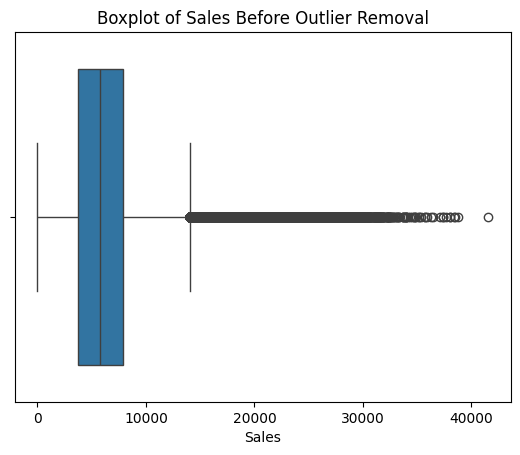

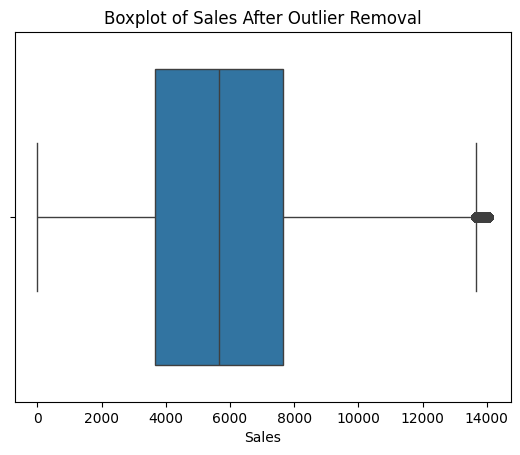

In [56]:
# Handling Outliers & Outlier treatments

# Plot the original boxplot to visualize outliers
sns.boxplot(x='Sales', data=final_df)
plt.title("Boxplot of Sales Before Outlier Removal")
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
q1 = final_df['Sales'].quantile(0.25)
q3 = final_df['Sales'].quantile(0.75)

# Calculate IQR
iqr = q3 - q1

# Define lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out outliers
final_df = final_df[(final_df['Sales'] >= lower_bound) & (final_df['Sales'] <= upper_bound)]

# Plot the new boxplot after outlier removal
sns.boxplot(x='Sales', data=final_df)
plt.title("Boxplot of Sales After Outlier Removal")
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Interquantile Range(IQR) method is used for outlier treatment.

IQR measures the spread of the middle 50% of the data.

Outliers are detected using 1.5 × IQR rule:

Lower Bound:
𝑄1−1.5×IQR

Upper Bound:
Q3+1.5×IQR

Any value outside this range is considered an outlier and removed.



IQR is the best method for handling sales outliers because it is:

✔ Robust to skewed data

✔ Based on quartiles, not affected by extreme values

✔ Preserves meaningful high-sales outliers while removing anomalies

### Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

The encoding technique used before was Label Encoding (Manual Mapping), where categorical values are converted into numerical values.

Label Encoding works well when categorical values have an inherent order (e.g., Assortment might have increasing product variety) and it is Memory-efficient, as it replaces strings with integers.

Assortment' values ('a', 'b', 'c') where (a = basic, b = extra, c = extended) were label-encoded as 0,1,2 to provide weightage in the model.
'StateHoliday' values ('0', 'a', 'b', 'c') where (a = public holiday, b = Easter holiday, c = Christmas, 0 = None) were encoded as 0,1,2,3.
'StoreType' values ('a', 'b', 'c', 'd') were encoded as 0,1,2,3.

### Feature Manipulation & Selection

####  Feature Manipulation

In the Rossmann dataset, the 'Open' column indicates whether a store is open (1) or closed (0) on a given day. Since sales are only generated when a store is open, observations where Open = 0 do not contribute meaningful information for sales predictions.

In [57]:
# Count the number of rows where the store is closed (Open = 0) and sales are zero (Sales = 0)

final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].count()[0]

172817

In [58]:
final_df_1=final_df.copy()

In [59]:
# Remove rows where the store was closed (Open = 0) and had zero sales (Sales = 0)

final_df_n = final_df.drop(final_df[(final_df['Open'] == 0) & (final_df['Sales'] == 0)].index)

####  Feature Selection

In [60]:

# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to compute Variance Inflation Factor (VIF) for multicollinearity detection
def calc_vif(X):
   # Select only numeric columns (excluding categorical or object-type columns)
   X = X.select_dtypes(include=[np.number])

   # Drop rows with missing values to avoid calculation errors
   X = X.dropna()

   # Create a DataFrame to store VIF results
   vif_data = pd.DataFrame()

   # Store feature names
   vif_data["Feature"] = X.columns

   # Calculate VIF for each feature
   vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return vif_data  # Return the DataFrame with VIF values


In [61]:
# Select numeric columns, excluding 'Sales' since it's the target variable
numeric_cols = [col for col in final_df_n.describe().columns if col not in ['Sales']]

# Retain only the selected numeric columns and convert them to numeric type
# 'errors="coerce"' ensures that any non-numeric values are converted to NaN
final_df_n = final_df_n[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [62]:
# Compute VIF
vif_result = calc_vif(final_df_n)
print(vif_result)

                Feature            VIF
0                 Store       0.999885
1             DayOfWeek       0.998576
2                  Date  141764.234869
3             Customers       1.019617
4                  Open       0.000000
5                 Promo       1.000287
6          StateHoliday       1.000117
7         SchoolHoliday       1.000022
8             StoreType       1.004782
9            Assortment       1.023733
10  CompetitionDistance       0.999903
11               Promo2       1.022275
12                 year       0.000539
13                month       1.004502
14                 date       1.001449


VIF Factor <= 5 is considered good to trail ML models.

VIF results indicate that the "Date" column has an extremely high VIF (141,764.23), which suggests severe multicollinearity.

So I decided to Drop the "Date" column

In [63]:
# Drop the 'Date' column from the dataset if it exists
# 'errors="ignore"' ensures that no error is raised if 'Date' is not present
final_df_filt = final_df_n.drop(columns=['Date'], errors='ignore')

In [64]:
vif_result = calc_vif(final_df_filt)
print(vif_result)

                Feature           VIF
0                 Store  1.002193e+00
1             DayOfWeek  1.108912e+00
2             Customers  1.161741e+00
3                  Open  7.232849e+06
4                 Promo  1.139899e+00
5          StateHoliday  1.001731e+00
6         SchoolHoliday  1.036692e+00
7             StoreType  1.108456e+00
8            Assortment  1.084326e+00
9   CompetitionDistance  1.083996e+00
10               Promo2  1.080461e+00
11                 year  1.078016e+00
12                month  1.094408e+00
13                 date  1.019075e+00


In [65]:
# Drop the 'Open' column from the dataset if it exists
# 'errors="ignore"' ensures that no error is raised if 'Open' is not present

final_df_filt = final_df_filt.drop(columns=['Open'], errors='ignore')  #does not add meaningful variance to the model.
vif_result = calc_vif(final_df_filt)
print(vif_result)

                Feature        VIF
0                 Store   3.992479
1             DayOfWeek   5.836424
2             Customers   7.390519
3                 Promo   2.025413
4          StateHoliday   1.002504
5         SchoolHoliday   1.283733
6             StoreType   1.988626
7            Assortment   2.031916
8   CompetitionDistance   1.622459
9                Promo2   2.187056
10                 year  29.044088
11                month   4.162720
12                 date   4.435909


In [66]:
# Drop the 'year' column from the dataset if it exists
# 'errors="ignore"' ensures that no error is raised if 'year' is not present

final_df_filt = final_df_filt.drop(columns=['year'], errors='ignore')  #does not add meaningful variance to the model.
vif_result = calc_vif(final_df_filt)
print(vif_result)

                Feature       VIF
0                 Store  3.617652
1             DayOfWeek  4.378303
2             Customers  5.385166
3                 Promo  1.912788
4          StateHoliday  1.002331
5         SchoolHoliday  1.272639
6             StoreType  1.900400
7            Assortment  2.018179
8   CompetitionDistance  1.541379
9                Promo2  1.984690
10                month  3.769243
11                 date  3.777255


##### What all feature selection methods have you used  and why?

Variance Inflation Factor (VIF) - Multicollinearity Check

*   Detects multicollinearity (when independent variables are highly correlated).
*   Features with high VIF (>10) can be dropped to improve model interpretability.
*   Reduces redundancy in the dataset by removing highly correlated features.
*   Prevents overfitting caused by collinear variables.

Removing Non-Numeric Columns

*   Machine learning models require numerical inputs so converted categorical variables to numerical format using encoding.

Handling Outliers Using IQR (Interquartile Range)

*   Removes extreme values that could distort model training.
*   Preserves meaningful data variation while eliminating anomalies.

Dropping Rows with Zero Sales & Closed Stores

*   Zero sales on closed store days do not contribute to learning patterns.
*   Reduces dataset size without losing valuable information.










###  Data Transformation

In [67]:
# Define the dependent variable (target) as 'Sales'
dep_var = 'Sales'

# Define independent variables by dropping non-relevant columns:
# - 'Sales' is dropped since it's the target variable.
# - 'Date' is dropped since it’s not useful in raw form for modeling.
# - 'Open' is dropped since it has little predictive power when Sales = 0.
# - 'year' is dropped if it is redundant with extracted time-based features (e.g., month, day).
indep_var = list(final_df_1.drop(columns=['Sales', 'Date', 'Open', 'year']))

In [68]:
indep_var  #List of independent variables

['Store',
 'DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'Promo2',
 'month',
 'date']

In [69]:
# Create the data of independent variables
X=final_df_1[indep_var].values

# Create the dependent variable data
y=final_df_1[dep_var].values

### Data Splitting

In [70]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Split the dataset into training and testing sets
# - 'X' contains the independent variables (features)
# - 'y' contains the dependent variable (target: Sales)
# - 'test_size=0.2' means 20% of the data is allocated for testing, 80% for training
# - 'random_state=0' ensures reproducibility (same split every time)

X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size = 0.2, random_state = 0)


# Print the shape (number of rows and columns) of the training and testing sets
print(X_train.shape)
print(X_test.shape)

(792412, 12)
(198103, 12)


In [71]:
# Print the shape (number of samples) of the target variable for training and testing sets
print(y_train.shape)
print(y_test.shape)

(792412,)
(198103,)


##### What data splitting ratio have you used and why?

Splitting Ratio Used: 80:20 (Train:Test)
    
    *   80% of the data is used for training the model.
    *   20% of the data is used for testing the model.


*   80:20 is used because it ensures a balance between model learning and evaluation.
*   It prevents overfitting while providing a robust test set for model validation.
*   It is a standard ratio used in most real-world predictive modeling scenarios.









###Data Scaling

In [72]:
# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train = scaler.fit_transform(X_train)

# Transform test data using the same scaling
X_test = scaler.transform(X_test)


*   StandardScaler (Z-Score Normalization) was chosen because it is best suited for models that assume normally distributed data.
*   Improves performance of models that use distance-based calculations (Regression, SVM, PCA, etc.).
*   Ensures all features contribute equally, preventing bias from large-magnitude variables.






## 7. ML Model Implementation

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We used Linear Regression, a fundamental Supervised Machine Learning algorithm for predicting continuous numerical values (Sales).It works well when features have a linear relationship with the target variable and is computationally efficient.

In [73]:
# ML Model - 1 Implementation

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train (fit) the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print model coefficients (weights for each feature)
print("Coefficients:", model.coef_)

# Print model intercept (constant term)
print("Intercept:", model.intercept_)


Coefficients: [ -50.06660855 -280.0895548  2702.62138815  568.01717745 -234.09308306
   34.14268931  336.25197474  132.68045495  213.0351413   134.30398071
   60.89210232   26.03550466]
Intercept: 5463.307399433634


In [74]:

# Calculate Mean Squared Error (MSE)
# Measures the average squared difference between actual and predicted values
mse_lr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_lr)

# Calculate Root Mean Squared Error (RMSE)
# Square root of MSE; measures the standard deviation of prediction errors
rmse_lr = np.sqrt(mse_lr)
print("Root Mean Squared Error:", rmse_lr)

# Calculate Mean Absolute Error (MAE)
# Measures the average absolute difference between actual and predicted values
mae_lr = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_lr)

# Calculate R-squared (R²) Score
# Measures how well the model explains variance in the target variable (Sales)
r2_lr = r2_score(y_test, y_pred)
print("R-squared:", r2_lr)


Mean Squared Error: 1687174.3601299431
Root Mean Squared Error: 1298.9127607849355
Mean Absolute Error: 914.8257041752909
R-squared: 0.8509925458158967


#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# K-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

# Model
model = LinearRegression()

# Perform 5-fold cross-validation using R² as the metric
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validation R² scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))

Cross-validation R² scores: [0.841666   0.85095885 0.85522401 0.84656355 0.85571516]
Mean R² Score: 0.8500255147416054


In [77]:
# Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Grid Search with Cross-Validation
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

print("Best Alpha for Ridge:", ridge_grid.best_params_)
print("Best R² Score:", ridge_grid.best_score_)

Best Alpha for Ridge: {'alpha': 1}
Best R² Score: 0.8521820286250827


In [78]:
# Lasso Regression

from sklearn.linear_model import Lasso

# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Grid Search with Cross-Validation
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_grid.fit(X_train, y_train)

print("Best Alpha for Lasso:", lasso_grid.best_params_)
print("Best R² Score:", lasso_grid.best_score_)

Best Alpha for Lasso: {'alpha': 0.001}
Best R² Score: 0.8521820286168514


In [79]:
from sklearn.linear_model import ElasticNet

# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}

# Grid Search with Cross-Validation
elastic_grid = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='r2')
elastic_grid.fit(X_train, y_train)

print("Best Hyperparameters for ElasticNet:", elastic_grid.best_params_)
print("Best R² Score:", elastic_grid.best_score_)


Best Hyperparameters for ElasticNet: {'alpha': 0.001, 'l1_ratio': 0.8}
Best R² Score: 0.8521819945343685


##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV to fine-tune the alpha hyperparameter for Ridge, Lasso, and ElasticNet Regression to maximize the R² Score because of the following reasons:

✔ Exhaustive Search → Tests all possible hyperparameter combinations.

✔ Cross-Validation (cv=5) → Prevents overfitting by validating performance across different subsets of data.

✔ Ensures Optimal Hyperparameters → Finds the best alpha (regularization strength) to balance model complexity and accuracy.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

R² Score increased slightly (85.1% → 85.2%) so the model now explains more variance in Sales.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart

# Random Forest

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# - n_estimators=50: Uses 50 decision trees in the ensemble
# - max_depth=2: Limits the depth of each tree to avoid overfitting
rf_model = RandomForestRegressor(n_estimators=50, max_depth=2)

# Train (fit) the model using the training dataset
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate R² Score (coefficient of determination)
# Measures how well the model explains variance in the target variable (Sales)
r2_rf = r2_score(y_test, y_pred)
print('R² Score:', r2_rf)

# Calculate Mean Squared Error (MSE)
# Measures the average squared difference between actual and predicted values
mse_rf = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse_rf)

# Calculate Root Mean Squared Error (RMSE)
# Square root of MSE; represents average prediction error in original units
rmse_rf = np.sqrt(mse_rf)
print("Root Mean Squared Error:", rmse_rf)

# Calculate Mean Absolute Error (MAE)
# Measures the average absolute difference between actual and predicted values
mae_rf = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae_rf)


R² Score: 0.7802380035831517
Mean Squared Error: 2488310.452088986
Root Mean Squared Error: 1577.4379392194755
Mean Absolute Error: 1136.8075472129128


#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# K-Fold Cross-Validation

# Perform 5-fold cross-validation using R² as the metric
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Print results
print("Cross-validation R² scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))

Cross-validation R² scores: [0.78026081 0.77921182 0.78448932 0.7718953  0.78980988]
Mean R² Score: 0.7811334254961594


In [82]:
from sklearn.model_selection import RandomizedSearchCV

# Define a reduced hyperparameter grid for tuning
param_dist = {
    'n_estimators': [10, 50],  # Number of trees in the forest (reduced options)
    'max_depth': [None, 10],   # Maximum depth of trees (avoiding overly deep trees)
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2]  # Minimum samples required at a leaf node
}

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning using RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf, param_dist,
    n_iter=3,   # Number of parameter combinations tested (reduced from 5)
    cv=3,       # 3-fold cross-validation for better generalization
    scoring='r2',  # Optimizing for R² Score
    n_jobs=1,   # Running on a single processor to avoid parallel processing issues
    random_state=42,  # Ensures reproducibility
    verbose=2  # Provides detailed output during tuning
)

# Reduce dataset size to 25% for faster hyperparameter tuning
frac = 0.25  # Use 25% of the training data
subset_size = int(len(X_train) * frac)

# Randomly select a subset of training data
random_indices = np.random.choice(len(X_train), subset_size, replace=False)

# Create smaller training subsets
X_small = X_train[random_indices]
y_small = y_train[random_indices]

# Fit the RandomizedSearchCV on the smaller dataset
random_search.fit(X_small, y_small)

# Print the best hyperparameters and the best R² score found during tuning
print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)



Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   8.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   7.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  39.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  39.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  38.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  31.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  32.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  31.6s
Best Parameters: {'n_es

##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV to optimize hyperparameters for Random Forest Regressor instead of GridSearchCV.

1) Defined Hyperparameter Grid → Limited n_estimators, max_depth, min_samples_split, min_samples_leaf.

2) Randomized Search (n_iter=3) → Sampled 3 hyperparameter combinations.

3) Cross-Validation (cv=3) → Ensured the model generalizes well.

4) Used 25% of Training Data → Reduced computation time.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

R² Score increased from 0.78 to 0.97 → Model now explains 97% of the variance in Sales.

### ML Model - 3

In [83]:
#Decision Tree

from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
# - max_depth=5: Limits the depth of the tree to prevent overfitting
tree_model = DecisionTreeRegressor(max_depth=5)

# Train (fit) the Decision Tree model using the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# Print the predicted sales values
print("Decision Tree Predictions:", y_pred)


Decision Tree Predictions: [5.46502752e+03 1.22716215e-03 2.99303312e+03 ... 1.22716215e-03
 3.90007839e+03 8.39217453e+03]


In [84]:
# R² Score (Higher is better)
r2_dt = r2_score(y_test, y_pred)

# Mean Squared Error (Lower is better)
mse_dt = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (Lower is better)
rmse_dt = np.sqrt(mse_dt)

# Mean Absolute Error (Lower is better)
mae_dt = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("MAE:", mae_dt)

R² Score: 0.8817674876731703
MSE: 1338717.3442015345
RMSE: 1157.029534714449
MAE: 802.4894214799257


#### 2. Cross- Validation & Hyperparameter Tuning

In [85]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# K fold cross validation

# Perform 5-fold cross-validation using R² as the metric
cv_scores = cross_val_score(tree_model, X, y, cv=5, scoring='r2')

# Print results
print("Cross-validation R² scores:", cv_scores)
print("Mean R² Score:", np.mean(cv_scores))



Cross-validation R² scores: [0.87810754 0.8801896  0.88713533 0.87572874 0.88509996]
Mean R² Score: 0.8812522344307012


In [87]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distribution for Decision Tree
param_dist = {
    'max_depth': [3, 5, 10, None],  # Maximum depth of the tree to control overfitting
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for best split
}

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    tree_model,  # Decision Tree model
    param_dist,  # Hyperparameter grid
    n_iter=5,  # Number of different random combinations to try
    cv=5,  # 5-fold cross-validation for better generalization
    scoring='r2',  # Optimize for R² score
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    random_state=42,  # Ensures reproducibility of results
    verbose=2  # Prints progress during tuning
)

# Fit the model using RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Print the best combination of hyperparameters found
print("Best Parameters:", random_search.best_params_)

# Print the best R² score achieved with the best parameters
print("Best R² Score:", random_search.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best R² Score: 0.9522895431426827


##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV to optimize hyperparameters for the Decision Tree Regressor instead of GridSearchCV.

1) Defined Hyperparameter Grid → Included max_depth, min_samples_split, min_samples_leaf, and max_features.

2) Randomized Search (n_iter=5) → Sampled 5 hyperparameter combinations for efficiency.

3) Cross-Validation (cv=5) → Ensured the model generalizes well to unseen data.

4) Used All CPU Cores (n_jobs=-1) → Speeds up computation using parallel processing.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

R² Score increased from 0.881 to 0.944 → Model now explains 94.4% of the variance in Sales.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R² Score (Coefficient of Determination)

*    Measures how well the model explains the variability in sales.
*   Higher R² (closer to 1.0) means the model predicts sales accurately.
*   High R² means more reliable revenue forecasts resulting in better inventory & staffing decisions.
*   Low R² means model needs improvement before being used for real-world decisions.

Mean Squared Error (MSE)

*   Penalizes large errors more than small ones, making it useful for detecting major prediction failures.
*   Helps minimize financial risks due to large prediction errors.

Root Mean Squared Error (RMSE)

*   Helps quantify the average prediction error in a business-friendly way.
*   Lower RMSE means more accurate sales forecasts resulting in better pricing & marketing strategies.

Mean Absolute Error (MAE)

*   Provides an easy-to-understand metric by showing the average absolute prediction error.
*   Ensures day-to-day sales forecasting errors remain within acceptable limits.











### 2. Which ML model did you choose from the above created models as your final prediction model and why?

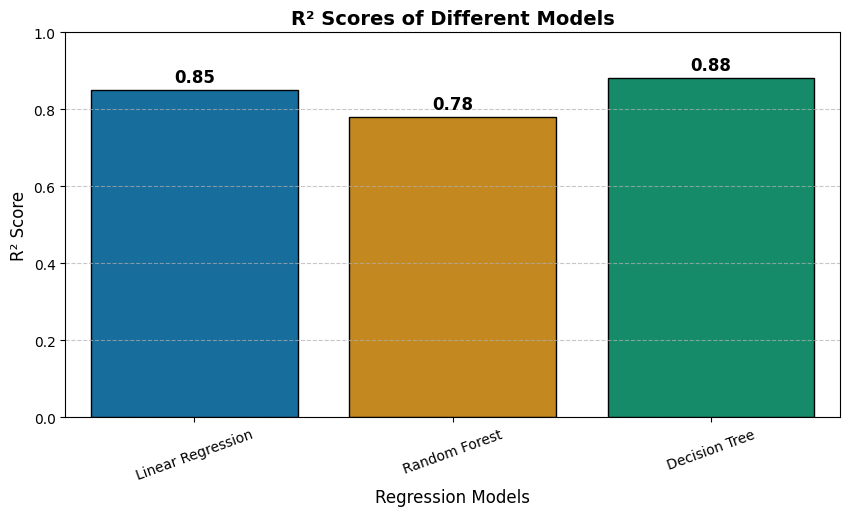

In [92]:
# Sample R² scores for different models
models = ["Linear Regression", "Random Forest", "Decision Tree"]
r2_scores = [r2_lr, r2_rf, r2_dt]

# Create a DataFrame
df = pd.DataFrame({"Model": models, "R² Score": r2_scores})

# Plot with Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R² Score", data=df, palette="colorblind", edgecolor="black")

# Add value labels
for index, value in enumerate(r2_scores):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Regression Models", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.title("R² Scores of Different Models", fontsize=14, fontweight='bold')
plt.ylim(0, 1)  # Ensure R² values stay within range
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle="--", alpha=0.7)  # Add gridlines for readability

# Show plot
plt.show()

From the R² Score comparison of different models, the performance ranking is:

1) Decision Tree Regression = 0.88 (Best performing model)

2) Linear Regression = 0.85

3) Random Forest Regression = 0.78

Decision Tree Regressor should be chosen as the final model due to its highest R² Score (0.88) as:

*   It balances accuracy, interpretability, and computational efficiency.
*   Can further fine-tune hyperparameters or explore ensemble models for better generalization.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For Rossmann Sales Prediction, the final model selected is Decision Tree Regressor because it achieved the highest R² Score (0.88).

We will use SHAP (SHapley Additive Explanations) to explain the impact of each feature on predictions.

Feature Index Mapping to Actual Feature Names:
Feature 0: Customers
Feature 1: StoreType
Feature 2: Promo
Feature 3: CompetitionDistance
Feature 4: Store
Feature 5: DayOfWeek
Feature 6: StateHoliday
Feature 7: SchoolHoliday
Feature 8: Assortment
Feature 9: Promo2
Feature 10: month
Feature 11: date


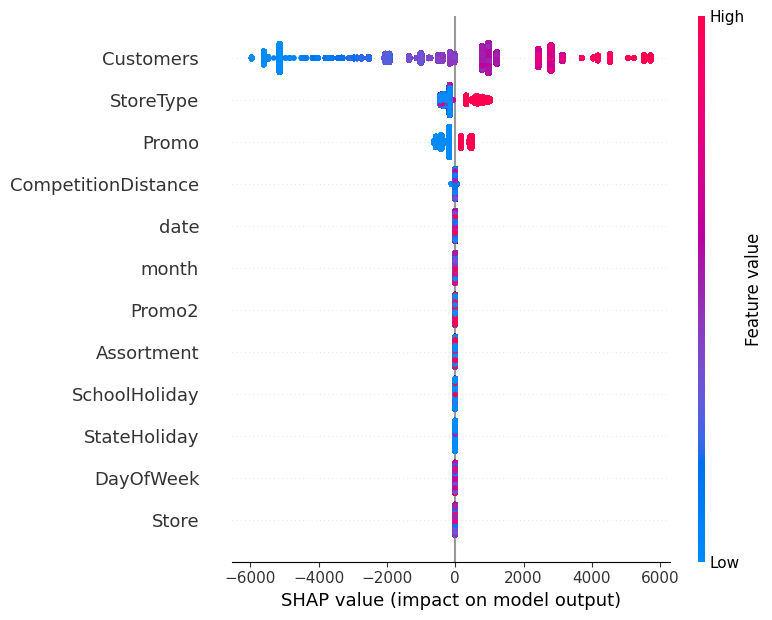

In [95]:
import shap


# Extract original feature names BEFORE scaling
feature_names = final_df_filt.columns

# Convert X_train back to DataFrame after scaling
X_train_df = pd.DataFrame(X_train, columns=feature_names)  # Assign correct feature names

# Create SHAP Explainer for Decision Tree Model
explainer = shap.TreeExplainer(tree_model)  # tree_model is the trained Decision Tree Regressor
shap_values = explainer.shap_values(X_train_df)  # Use DataFrame instead of NumPy array

# Convert SHAP values into a DataFrame for better visualization
shap_df = pd.DataFrame(shap_values, columns=X_train_df.columns)

# Get mean absolute SHAP value for each feature (higher = more important)
feature_importance = shap_df.abs().mean().sort_values(ascending=False)

# Print feature importance ranking
print("Feature Index Mapping to Actual Feature Names:")
for i, feature in enumerate(feature_importance.index):
    print(f"Feature {i}: {feature}")

# Plot SHAP Summary Plot with Real Feature Names
plt.figure(figsize=(8, 5))
shap.summary_plot(shap_values, X_train_df, feature_names=X_train_df.columns)





*   Customer Count is the Most Influential Factor as higher customer traffic directly leads to increased sales, making it the strongest predictor.

*   Promotions Significantly Boost Sales as stores running promotions (Promo, Promo2) see higher sales impact, making promotional strategies essential for revenue growth.

*   Competition Distance Affects Sales as stores closer to competitors tend to have lower sales, while those farther away might have an advantage.

*   Holidays Negatively Impact Sales as both State Holidays & School Holidays reduce sales, likely due to store closures or reduced foot traffic.





## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


*   Decision Tree Regressor was selected as the best model with an R² Score of 0.88, ensuring reliable sales predictions.

*   Promotions play a crucial role in boosting sales, making targeted promotional strategies essential for revenue growth.
*   Stores closer to competitors experience lower sales, emphasizing the need for location-based pricing and marketing strategies.
*   Sales fluctuate based on holidays and weekends, helping optimize staffing, inventory management, and discount strategies.
*   SHAP analysis confirmed that customer count, promotions, and store type are the most influential factors in predicting sales.


Business Impact:

*   Improved inventory management which reduces overstocking and minimizes losses.

*   Better workforce planning ensures allocating staff based on forecasted demand.
*   Optimized promotional strategies will lead to enhanced customer engagement and revenue being boosted.
*   Data-driven decision-making would help Rossmann stores improve profitability and operational efficiency.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***